In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

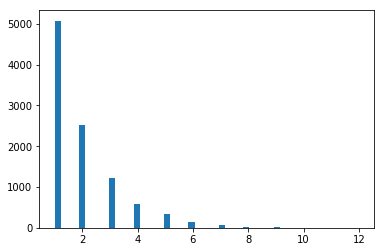

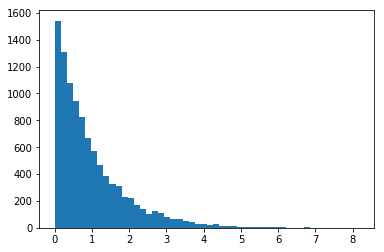

In [2]:
from scipy.stats import geom, expon, reciprocal
geom_distrib = geom(0.5).rvs(10000, random_state=42)
expon_distrib = expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

In [3]:
recipro_sampling = reciprocal(20, 200000).rvs(10000, random_state=42)

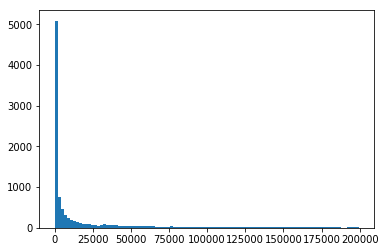

In [4]:
_ = plt.hist(recipro_sampling, bins=100)

In [5]:
recipro_sampling.max()

199480.6105572052

In [6]:
np.exp(-2)

0.1353352832366127

In [7]:
np.log([20, 200000])

array([ 2.99573227, 12.20607265])

In [8]:
np.exp([-2, 2])

array([0.13533528, 7.3890561 ])

#### Load Dataset

In [9]:
from keras.datasets import mnist

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [13]:
pd.value_counts(y_train, normalize=True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
dtype: float64

In [14]:
pd.value_counts(y_test, normalize=True)

1    0.1135
2    0.1032
7    0.1028
3    0.1010
9    0.1009
4    0.0982
0    0.0980
8    0.0974
6    0.0958
5    0.0892
dtype: float64

#### Training a Binary Classifier

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
sgd_clf = SGDClassifier(random_state=42, max_iter=20)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=20, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [17]:
sgd_clf.predict([X_train[0]]), y_train[0]

(array([ True]), 5)

In [18]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96335, 0.9666 , 0.96495])

In [19]:
skfold = StratifiedKFold(n_splits=3, random_state=42)

In [20]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=skfold, scoring='accuracy')

array([0.96335, 0.9666 , 0.96495])

In [21]:
y_pred_cv = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
y_pred_cv

array([ True, False, False, ...,  True, False, False])

#### Confusion Matrix, Precision, and Recall

In [23]:
confusion_matrix(y_train_5, y_pred_cv)

array([[53685,   894],
       [ 1208,  4213]], dtype=int64)

In [24]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [25]:
precision_score(y_train_5, y_pred_cv)

0.8249461523399256

In [26]:
recall_score(y_train_5, y_pred_cv)

0.7771628850765542

In [27]:
(4700)/(4700+2524)

0.6506090808416389

In [28]:
(4700)/(4700+721)

0.8669987087253275

In [29]:
f1_score(y_train_5, y_pred_cv)

0.8003419452887539

In [30]:
sgd_clf.decision_function(X_train[:5])

array([  53674.2914823 ,  -96580.63795561, -147534.95182265,
        -56634.40153077,  -65360.38714774])

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, 
                             cv=3, method='decision_function')

In [32]:
y_scores[:10]

array([  42476.1529556 , -131622.79098814, -237316.90546269,
        -83468.19903485, -129674.97332545,  -36564.18292496,
        -94304.0677438 , -172413.86563368,  -17696.25674778,
        -61393.76448499])

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [34]:
def plot_precision_recall_by_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, precisions[:-1], '--', label='precision')
    plt.plot(thresholds, recalls[:-1], '-', label='recall')
    plt.xlabel('thresholds')
    plt.legend(loc='best')
    plt.ylim([0, 1])

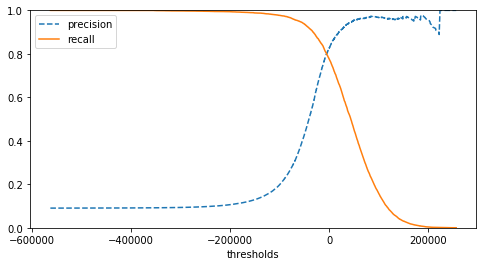

In [35]:
plot_precision_recall_by_threshold(precisions, recalls, thresholds)

Text(0,0.5,'precision')

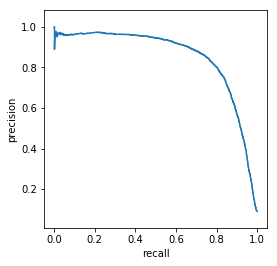

In [36]:
plt.figure(figsize=(4, 4))
plt.plot(recalls, precisions)
plt.axis('equal')
plt.xlabel('recall')
plt.ylabel('precision')

#### The ROC Curve

In [37]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [38]:
fpr.shape, tpr.shape, thresholds.shape

((3253,), (3253,), (3253,))

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])

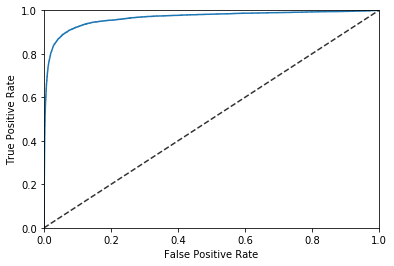

In [40]:
plot_roc_curve(fpr, tpr)

In [41]:
roc_auc_score(y_train_5, y_scores)

0.9654795019503638

In [42]:
roc_auc_score(y_train_5, 
              cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function'))

0.9654795019503638

In [43]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
y_scores_rf = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [45]:
y_scores_rf = y_scores_rf[:, 1]

In [46]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_scores_rf)

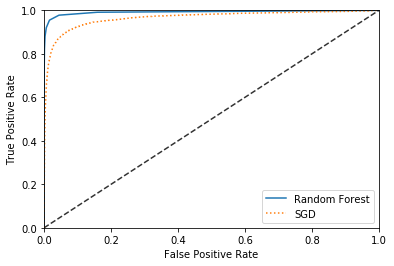

In [47]:
plot_roc_curve(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr, tpr, ':', label='SGD')
plt.legend(loc='lower right')

In [48]:
roc_auc_score(y_train_5, y_scores_rf)

0.9920527492698306

In [49]:
y_pred_rf = cross_val_predict(rf_clf, X_train, y_train_5, cv=3)

In [50]:
confusion_matrix(y_train_5, y_pred_rf)

array([[54516,    63],
       [  969,  4452]], dtype=int64)

In [51]:
4452/(4452+63), precision_score(y_train_5, y_pred_rf)

(0.986046511627907, 0.986046511627907)

In [52]:
4452/(4452+969), recall_score(y_train_5, y_pred_rf)

(0.8212506917542889, 0.8212506917542889)

In [53]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_rf)

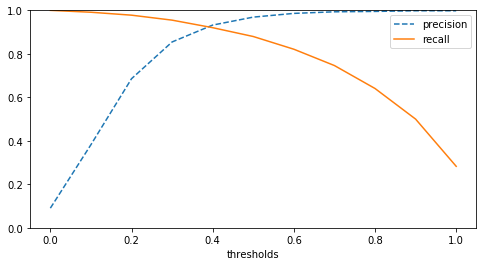

In [54]:
plot_precision_recall_by_threshold(precisions, recalls, thresholds)


#### Multiclass Classification

In [55]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=20, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [56]:
sgd_clf.predict([X_train[0]]), y_train[0]

(array([5], dtype=uint8), 5)

In [57]:
sgd_clf.decision_function([X_train[0]])

array([[-113097.93559349, -172827.62498682, -125487.95028287,
         -38952.59366417, -196736.66768865,   53674.2914823 ,
        -156942.94365886, -115228.79312098, -140156.16585151,
        -134322.13012989]])

In [58]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [59]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
rf_clf.predict([X_train[0]]), y_train[0]

(array([5], dtype=uint8), 5)

In [61]:
rf_clf.predict_proba([X_train[0]])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [62]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.86237752, 0.85044252, 0.87653148])

In [63]:
cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.94116177, 0.93949697, 0.94374156])

In [64]:
X_train_scaled = StandardScaler().fit_transform(X_train.astype(float))

In [65]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90761848, 0.90989549, 0.91283693])

In [66]:
std_sgd_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', sgd_clf),
])

cross_val_score(std_sgd_pipe, X_train.astype(float), y_train, cv=3, scoring='accuracy')

array([0.90716857, 0.90924546, 0.91323699])

#### Error Analysis

In [67]:
y_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [77]:
sgd_conmat = confusion_matrix(y_train, y_pred_sgd)

In [69]:
sgd_conmat

array([[5671,    1,   50,   16,    5,   41,   45,   34,   45,   15],
       [   2, 6497,   47,   45,    9,   38,    5,   19,   63,   17],
       [  46,   92, 5145,  139,   48,   72,   86,  121,  194,   15],
       [  31,   38,  225, 5251,   14,  222,   21,  106,  123,  100],
       [  27,   27,   45,   15, 4939,   22,   76,  117,  135,  439],
       [  69,   32,   55,  233,   67, 4441,   83,   89,  264,   88],
       [  64,   34,   52,   12,   46,  217, 5401,   27,   63,    2],
       [  19,   20,   57,   45,   35,   18,    2, 5710,   27,  332],
       [  57,  265,  152,  182,   71,  481,   55,  117, 4327,  144],
       [  41,   21,   29,  123,  418,   51,    3,  781,   77, 4405]],
      dtype=int64)

Text(51,0.5,'Actual')

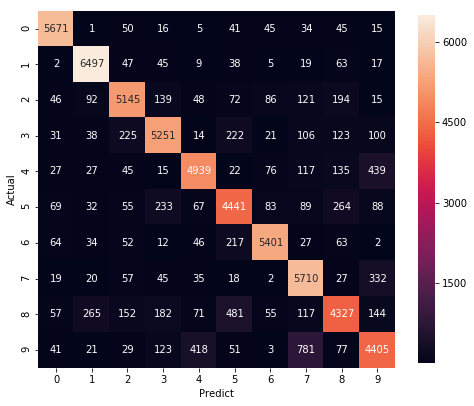

In [70]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]})
sns.heatmap(sgd_conmat, square=True, annot=True, fmt='.0f', cbar_kws={'shrink':.8},
            xticklabels=range(10), yticklabels=range(10), ax=ax)
plt.xlabel('Predict')
plt.ylabel('Actual')

In [78]:
sgd_conmat = sgd_conmat / sgd_conmat.sum(axis=1, keepdims=True)

In [81]:
np.fill_diagonal(sgd_conmat, 0)

Text(51,0.5,'Actual')

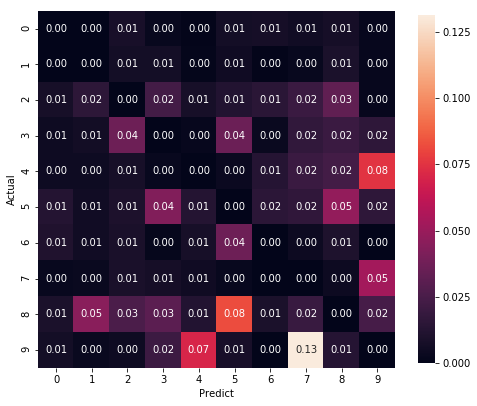

In [82]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]})
sns.heatmap(sgd_conmat, square=True, annot=True, fmt='.2f', cbar_kws={'shrink':.8},
            xticklabels=range(10), yticklabels=range(10), ax=ax)
plt.xlabel('Predict')
plt.ylabel('Actual')

In [83]:
y_pred_sgd.shape, y_train.shape

((60000,), (60000,))

In [85]:
# most error numbers -> (7, 9)
cls_a, cls_b = 7, 9

X_aa = X_train[(y_train==cls_a) & (y_pred_sgd==cls_a)]
X_ab = X_train[(y_train==cls_a) & (y_pred_sgd==cls_b)]
X_ba = X_train[(y_train==cls_b) & (y_pred_sgd==cls_a)]
X_bb = X_train[(y_train==cls_b) & (y_pred_sgd==cls_b)]

In [87]:
X_aa.shape, X_ab.shape, X_ba.shape, X_bb.shape

((5710, 784), (332, 784), (781, 784), (4405, 784))

In [89]:
size = 28

def make_5x5_grid(X):
    img = np.vstack((np.hstack(list(X[row*5:(row+1)*5].reshape((-1, size, size)))) 
                     for row in range(5)))
    return img

Text(0.5,1,'true:9/pred:9')

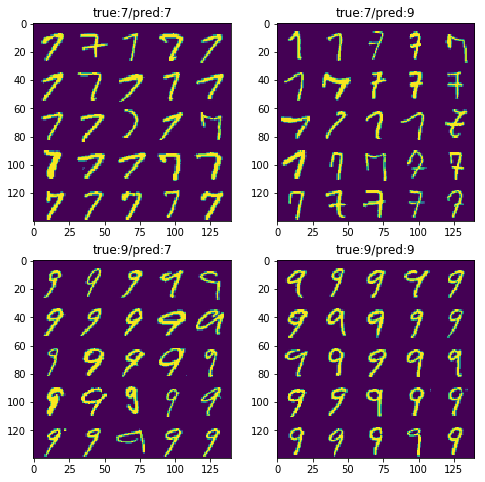

In [104]:
plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(make_5x5_grid(X_aa))
plt.title("true:{}/pred:{}".format(cls_a, cls_a))

plt.subplot(222)
plt.imshow(make_5x5_grid(X_ab))
plt.title("true:{}/pred:{}".format(cls_a, cls_b))


plt.subplot(223)
plt.imshow(make_5x5_grid(X_ba))
plt.title("true:{}/pred:{}".format(cls_b, cls_a))

plt.subplot(224)
plt.imshow(make_5x5_grid(X_bb))
plt.title("true:{}/pred:{}".format(cls_b, cls_b))



In [105]:
KNeighborsClassifier()

255

In [108]:
std_knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(std_knn_pipe, params, cv=5, scoring='accuracy', verbose=2)

In [ ]:
knn_grid.fit(X_train.astype(float), y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] knn__weights=uniform, knn__n_neighbors=3 ........................
[CV] ......... knn__weights=uniform, knn__n_neighbors=3, total=27.3min
[CV] knn__weights=uniform, knn__n_neighbors=3 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 614.1min remaining:    0.0s


[CV] ......... knn__weights=uniform, knn__n_neighbors=3, total=12.0min
[CV] knn__weights=uniform, knn__n_neighbors=3 ........................
[CV] ......... knn__weights=uniform, knn__n_neighbors=3, total=12.0min
[CV] knn__weights=uniform, knn__n_neighbors=3 ........................
[CV] ......... knn__weights=uniform, knn__n_neighbors=3, total=11.9min
[CV] knn__weights=uniform, knn__n_neighbors=3 ........................
[CV] ......... knn__weights=uniform, knn__n_neighbors=3, total=13.3min
[CV] knn__weights=distance, knn__n_neighbors=3 .......................
[CV] ........ knn__weights=distance, knn__n_neighbors=3, total=29.2min
[CV] knn__weights=distance, knn__n_neighbors=3 .......................
[CV] ....... knn__weights=distance, knn__n_neighbors=3, total=921.4min
[CV] knn__weights=distance, knn__n_neighbors=3 .......................
[CV] ........ knn__weights=distance, knn__n_neighbors=3, total=27.5min
[CV] knn__weights=distance, knn__n_neighbors=3 .......................
[CV] .